# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tanjung selor
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | natal
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | dod ballapur
Processing Record 10 of Set 1 | nouadhibou
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | gamla uppsala
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | muragacha
Processing Record 17 of Set 1 | alvorada
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | fale old settlement
Processing Record 20 of Set 1 | puerto aysen
Processing Record 21 of Set 1 | kavaratti
Processing Record 22 of Set 1 | hami
Proces

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data
    
)



# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tanjung selor,2.8372,117.3642,23.84,97,96,0.55,ID,1723036765
1,georgetown,5.4112,100.3354,29.97,68,20,3.09,MY,1723036722
2,san patricio,28.0170,-97.5169,28.25,79,0,2.88,US,1723036735
3,iqaluit,63.7506,-68.5145,8.85,76,40,1.03,CA,1723036771
4,natal,-5.7950,-35.2094,25.36,100,75,4.12,BR,1723036290


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanjung selor,2.8372,117.3642,23.84,97,96,0.55,ID,1723036765
1,georgetown,5.4112,100.3354,29.97,68,20,3.09,MY,1723036722
2,san patricio,28.0170,-97.5169,28.25,79,0,2.88,US,1723036735
3,iqaluit,63.7506,-68.5145,8.85,76,40,1.03,CA,1723036771
4,natal,-5.7950,-35.2094,25.36,100,75,4.12,BR,1723036290


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

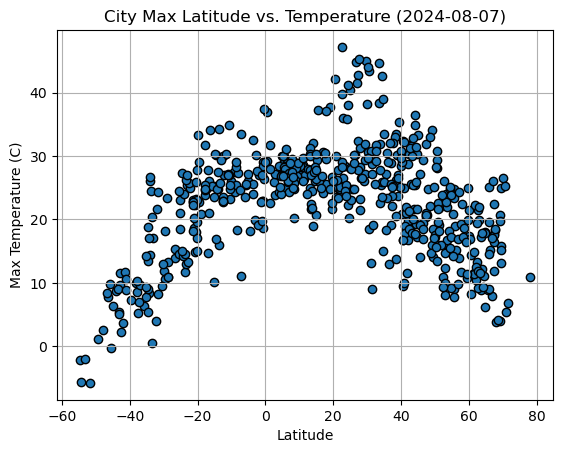

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-08-07)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

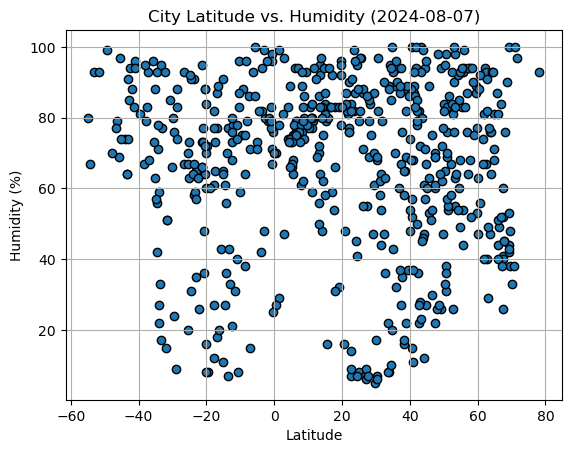

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-08-07)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

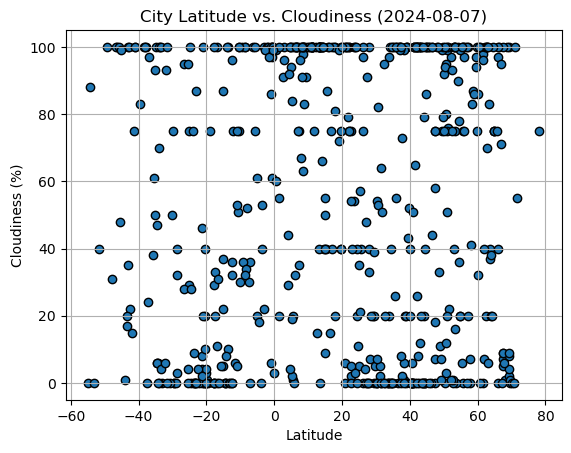

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-08-07)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

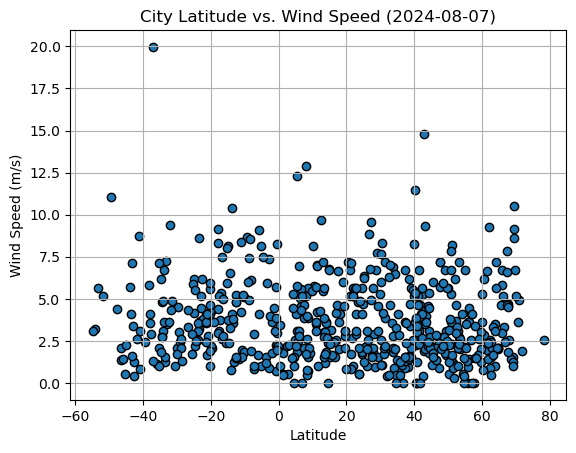

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-08-07)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots

def linear_plot(x,y,x_coord,y_coord): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The r^2-value is: {rvalue**2}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.annotate(line_eq,(x_coord,y_coord),fontsize=15,color="red")
    plt.plot(x,regress_values,"r-")

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanjung selor,2.8372,117.3642,23.84,97,96,0.55,ID,1723036765
1,georgetown,5.4112,100.3354,29.97,68,20,3.09,MY,1723036722
2,san patricio,28.0170,-97.5169,28.25,79,0,2.88,US,1723036735
3,iqaluit,63.7506,-68.5145,8.85,76,40,1.03,CA,1723036771
8,dod ballapur,13.2919,77.5431,24.91,86,100,3.01,IN,1723036776


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,natal,-5.7950,-35.2094,25.36,100,75,4.12,BR,1723036290
5,port-aux-francais,-49.3500,70.2167,1.17,99,100,11.03,TF,1723036773
6,waitangi,-43.9535,-176.5597,8.79,74,1,5.68,NZ,1723036774
7,grytviken,-54.2811,-36.5092,-5.68,67,88,3.23,GS,1723036775
11,ushuaia,-54.8000,-68.3000,-2.19,80,0,3.09,AR,1723036780


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3229362252508443


Text(0.5, 1.0, 'Latitude vs Max Temp')

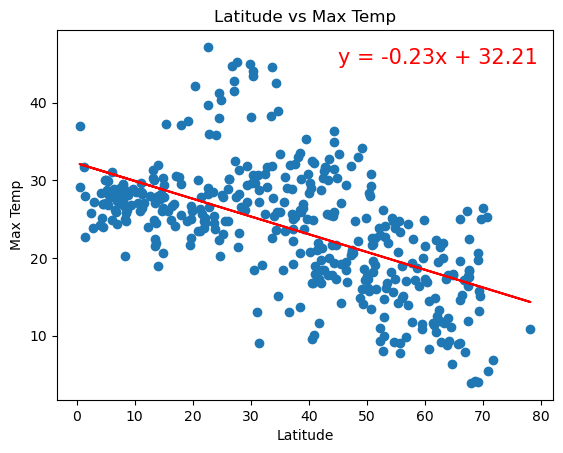

In [56]:
# Linear regression on Northern Hemisphere
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Max Temp"]
linear_plot(x,y,45,45)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")


The r^2-value is: 0.6184492094499341


Text(0.5, 1.0, 'Latitude vs Max Temp')

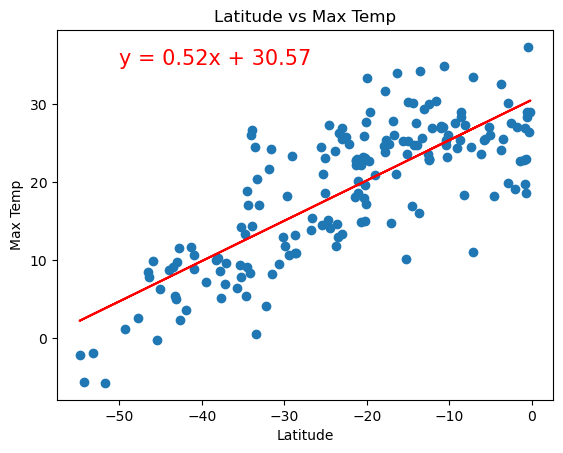

In [55]:
# Linear regression on Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Max Temp"]
linear_plot(x,y,-50,35)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

**Discussion about the linear relationship:** 
The r^2 value for the relationship between northern hemisphere's latitude and max temperature indicates a low relationship between the two variables.
The r^2 value for the relationship between southern hemisphere's latitude and max temperature indicates a moderate relationship between the two variables.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.009821955377914776


Text(0.5, 1.0, 'Latitude vs Humidity')

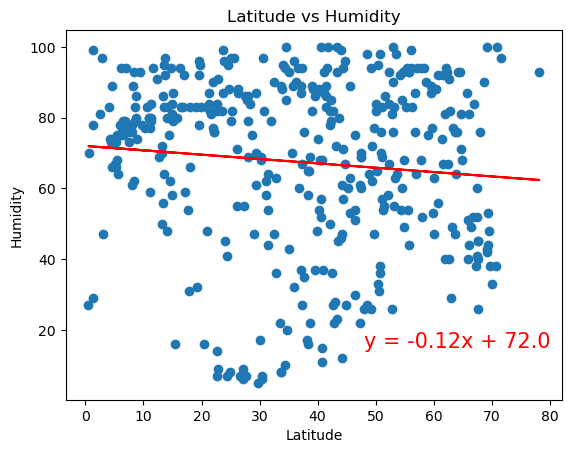

In [59]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Humidity"]
linear_plot(x,y,48,15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

The r^2-value is: 0.00972469857602479


Text(0.5, 1.0, 'Latitude vs Humidity')

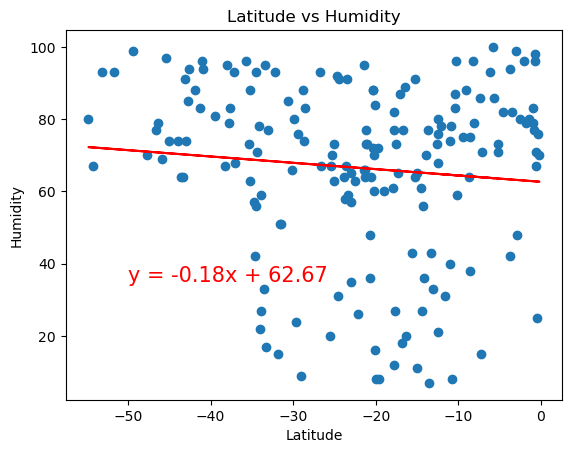

In [64]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Humidity"]
linear_plot(x,y,-50,35)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

**Discussion about the linear relationship:**
The r^2 value for the relationship between northern hemisphere's latitude and humidity indicates no relationship between the two variables.
The r^2 value for the relationship between southern hemisphere's latitude and humidity indicates no relationship between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.02449879961888873


Text(0.5, 1.0, 'Latitude vs CLoudiness')

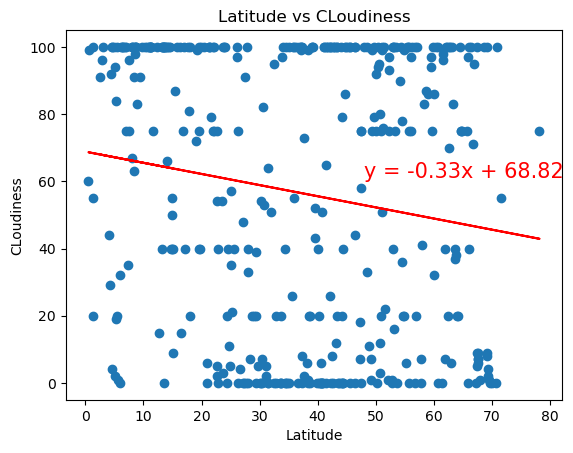

In [61]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Cloudiness"]
linear_plot(x,y,48,61)
plt.xlabel("Latitude")
plt.ylabel("CLoudiness")
plt.title("Latitude vs CLoudiness")

The r^2-value is: 0.0003139256042371919


Text(0.5, 1.0, 'Latitude vs Cloudiness')

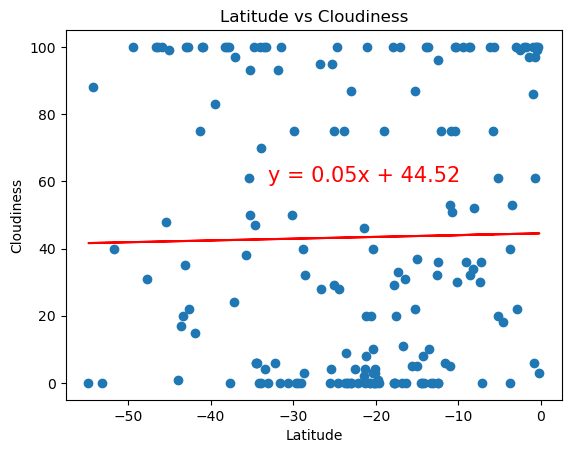

In [66]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Cloudiness"]
linear_plot(x,y,-33,60)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

**Discussion about the linear relationship:** 
The r^2 value for the relationship between northern hemisphere's latitude and cloudiness indicates no relationship between the two variables.
The r^2 value for the relationship between southern hemisphere's latitude and cloudiness indicates no relationship between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0006166571092992761


Text(0.5, 1.0, 'Latitude vs Wind Speed')

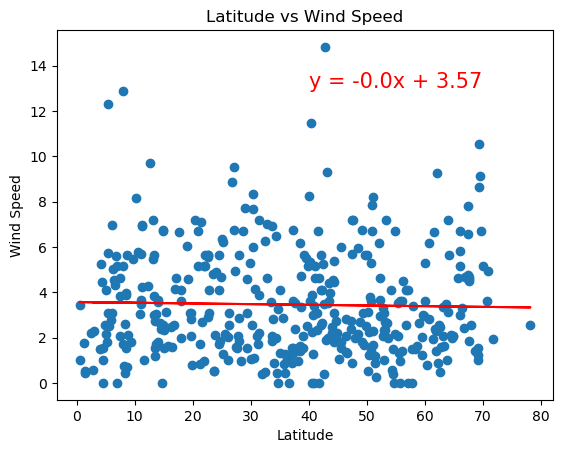

In [63]:
# Northern Hemisphere
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Wind Speed"]
linear_plot(x,y,40,13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

The r^2-value is: 0.000843236001305967


Text(0.5, 1.0, 'Latitude vs Wind Speed')

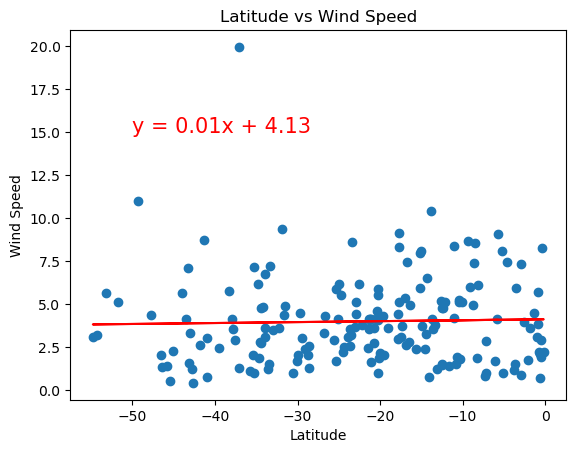

In [68]:
# Southern Hemisphere
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Wind Speed"]
linear_plot(x,y,-50,15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

**Discussion about the linear relationship:** 
The r^2 value for the relationship between northern hemisphere's latitude and wind speed indicates no relationship between the two variables.
The r^2 value for the relationship between southern hemisphere's latitude and wind speed indicates no relationship between the two variables.